In [30]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import glob
import pandas as pd
from collections import defaultdict


In [31]:
df = pd.read_table("peak_values.tsv")
df = df.rename(columns={"sample": "samp"})


In [32]:
def subtract_paraffin(df):
    values = []
    for i,r in df.iterrows():
        # this involves a lot of repeated computation, but it's fine for now
        paraffin_val = df[(df.odor == 'paraffin') & (df.samp == r.samp) & (df.trial == r.trial)].peak_value
        value = np.max(r.peak_value - paraffin_val, 0)
        # value = r.peak_value - paraffin_val
        values.append(value)
    return values

df['paraffin_subtracted_vals'] = subtract_paraffin(df)


/jukebox/mcbride/bjarnold/miniforge3/envs/caiman/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/jukebox/mcbride/bjarnold/miniforge3/envs/caiman/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


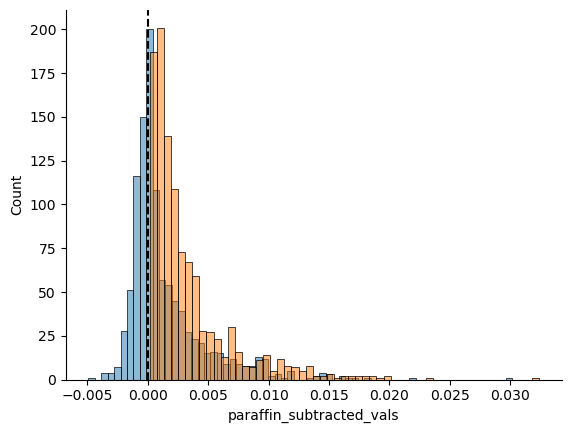

In [39]:
sns.histplot(df, x='paraffin_subtracted_vals', alpha=0.5)
sns.histplot(df, x='peak_value', alpha=0.5)
plt.axvline(0, color='black', linestyle='--')
sns.despine()